In [1]:
import pandas as pd
import matplotlib
import numpy as np
import re

# Data Exploration

### __Read data to create dataframes__

In [2]:
brands = pd.read_csv('brands.csv')
orderlines = pd.read_csv('orderlines.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

og_brands = pd.read_csv('brands.csv')
og_orderlines = pd.read_csv('orderlines.csv')
og_orders = pd.read_csv('orders.csv')
og_products = pd.read_csv('products.csv')

### __Inspect dataframes heads and tails__

In [3]:
print('###################### BRANDS \n', brands.head(),'\n', brands.tail(),'\n---')
print('###################### ORDERLINES \n', orderlines.head().to_string(),'\n', orderlines.tail().to_string(),'\n---')
print('###################### ORDERS \n', orders.head().to_string(), '\n', orders.tail().to_string(),'\n---')
print('###################### PRODUCTS \n', products.head().to_string(), '\n', products.tail().to_string(),'\n---')

###################### BRANDS 
   short       long
0   8MO  8Mobility
1   ACM       Acme
2   ADN     Adonit
3   AII      Aiino
4   AKI     Akitio 
     short      long
182   XOO    Xoopar
183   XRI    X-Rite
184   XTO     Xtorm
185   ZAG  ZaggKeys
186   ZEP      Zepp 
---
###################### ORDERLINES 
         id  id_order  product_id  product_quantity      sku unit_price                 date
0  1119109    299539           0                 1  OTT0133      18.99  2017-01-01 00:07:19
1  1119110    299540           0                 1  LGE0043     399.00  2017-01-01 00:19:45
2  1119111    299541           0                 1  PAR0071     474.05  2017-01-01 00:20:57
3  1119112    299542           0                 1  WDT0315      68.39  2017-01-01 00:51:40
4  1119113    299543           0                 1  JBL0104      23.74  2017-01-01 01:06:38 
              id  id_order  product_id  product_quantity      sku unit_price                 date
293978  1650199    527398           0   

### __Gather some basic descriptives for all the dataframes__

#### brands

In [4]:
print('\n################################## .describe() \n\n', brands.describe())
print('\n################################## .isna().any() \n\n', brands.isna().any())
print('\n################################## .shape \n\n', brands.shape)
print('\n################################## .columns \n\n', brands.columns)


################################## .describe() 

        short    long
count    187     187
unique   187     181
top      8MO  Mophie
freq       1       2

################################## .isna().any() 

 short    False
long     False
dtype: bool

################################## .shape 

 (187, 2)

################################## .columns 

 Index(['short', 'long'], dtype='object')


#### orderlines



In [5]:
print(orderlines.head().to_string())
print('\n################################## .describe() \n\n', orderlines.describe())
print('\n################################## .isna().any() \n\n', orderlines.isna().any())
print('\n################################## .shape \n\n', orderlines.shape)
print('\n################################## .columns \n\n', orderlines.columns)

        id  id_order  product_id  product_quantity      sku unit_price                 date
0  1119109    299539           0                 1  OTT0133      18.99  2017-01-01 00:07:19
1  1119110    299540           0                 1  LGE0043     399.00  2017-01-01 00:19:45
2  1119111    299541           0                 1  PAR0071     474.05  2017-01-01 00:20:57
3  1119112    299542           0                 1  WDT0315      68.39  2017-01-01 00:51:40
4  1119113    299543           0                 1  JBL0104      23.74  2017-01-01 01:06:38

################################## .describe() 

                  id       id_order  product_id  product_quantity
count  2.939830e+05  293983.000000    293983.0     293983.000000
mean   1.397918e+06  419999.116544         0.0          1.121126
std    1.530096e+05   66344.486479         0.0          3.396569
min    1.119109e+06  241319.000000         0.0          1.000000
25%    1.262542e+06  362258.500000         0.0          1.000000
50%    

#### orders

In [6]:
print(orders.head())
print('\n################################## .describe() \n\n', orders.describe())
print('\n################################## .isna().any() \n\n', orders.isna().any())
print('\n################################## .shape \n\n', orders.shape)
print('\n################################## .columns \n\n', orders.columns)
print('\n################################## .state.unique() \n\n', orders.state.unique())
print('\n################################## .order_id.duplicated \n\n', orders.order_id.duplicated().sum())

   order_id         created_date  total_paid      state
0    241319  2017-01-02 13:35:40       44.99  Cancelled
1    241423  2017-11-06 13:10:02      136.15  Completed
2    242832  2017-12-31 17:40:03       15.76  Completed
3    243330  2017-02-16 10:59:38       84.98  Completed
4    243784  2017-11-24 13:35:19      157.86  Cancelled

################################## .describe() 

             order_id     total_paid
count  226909.000000  226904.000000
mean   413296.482480     569.225818
std     65919.250331    1761.778002
min    241319.000000       0.000000
25%    356263.000000      34.190000
50%    413040.000000     112.990000
75%    470553.000000     525.980000
max    527401.000000  214747.530000

################################## .isna().any() 

 order_id        False
created_date    False
total_paid       True
state           False
dtype: bool

################################## .shape 

 (226909, 4)

################################## .columns 

 Index(['order_id', 'created_da

#### products

In [7]:
print(products.head().to_string())
print('\n################################## .describe() \n\n', products.describe())
print('\n################################## .isna().any() \n\n', products.isna().any())
print('\n################################## .shape \n\n', products.shape)
print('\n################################## .columns \n\n', products.columns)

       sku                                           name                                                           desc  price promo_price  in_stock      type
0  RAI0007              Silver Rain Design mStand Support                   Aluminum support compatible with all MacBook  59.99     499.899         1      8696
1  APP0023              Apple Mac Keyboard Keypad Spanish                      USB ultrathin keyboard Apple Mac Spanish.     59     589.996         0  13855401
2  APP0025               Mighty Mouse Apple Mouse for Mac                                         mouse Apple USB cable.     59     569.898         0      1387
3  APP0072  Apple Dock to USB Cable iPhone and iPod white                          IPhone dock and USB Cable Apple iPod.     25     229.997         0      1230
4  KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM  2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).  34.99       31.99         1      1364

################################## .des

# __Datacleaning__

## Cleaning orders

In [4]:
# Convert datatypes
orders['created_date'] = pd.to_datetime(orders['created_date'])

# Create new columns for 'year' (int), 'month' (int), 'day_of_month' (int), 'weekday' (categorical variable, ordered)
orders['year'] = pd.DatetimeIndex(orders['created_date']).year
orders['month'] = pd.DatetimeIndex(orders['created_date']).month
orders['day_of_month'] = pd.DatetimeIndex(orders['created_date']).day
orders['weekday'] = orders['created_date'].dt.strftime('%A')

# create sorted categories for weekday
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders['weekday'] = pd.Categorical(orders['weekday'], categories = cats, ordered=True)

# Exclude missing values in total_paid column (cause for missing values is order-state = pending) and check for na before and after manipulation
print(f'Nan-count before removal = {orders.total_paid.isna().sum()}')
orders.dropna(inplace=True)
print(f'Nan-count after removal = {orders.total_paid.isna().sum()}')

Nan-count before removal = 5
Nan-count after removal = 0


## Cleaning orderlines

In [5]:
# Convert datatypes
orderlines['date'] = pd.to_datetime(orderlines['date'])

# rename id_order to order_id to standardize it
orderlines.rename(columns={'id_order':'order_id'}, 
                   inplace=True)

In [6]:
# FIX UNIT_PRICE COLUMN DECIMAL ISSUE
## remove all decimal dots 
orderlines = orderlines.assign(unit_price_nd = orderlines['unit_price'].str.replace('\.','', regex=True))

## separate all numbers before and after the decimal dot
orderlines['integers'] = orderlines['unit_price_nd'].str[:-2]
orderlines['decimals'] = orderlines['unit_price_nd'].str[-2:]

## concatenate integers and decimals with dot in between
orderlines['new_unit_price'] = orderlines['integers'] + '.' + orderlines['decimals']

## create converted unit_price column based on fixed column
orderlines['unit_price'] = pd.to_numeric(orderlines['new_unit_price'])

## drop 'auxiliary' columns
orderlines.drop(['unit_price_nd','decimals','integers','new_unit_price'], axis=1, inplace=True)

# create a new column "total_price" by multiplying product_quantity times unit_price
orderlines['total_price'] = orderlines['product_quantity'] * orderlines['unit_price']

## Cleaning products

### Price and promo Price Columns
* First idea is to remove all rows containing prices that have three digits after the last dot
* For now dropping all na
* Checking the number of rows that have this issue: 
    * price: 537 / 10477 total rows
    * promo_price: 9638 / 10477 total rows

In [7]:
(
products
    .assign(duplicated = lambda df: df[['sku', 'price']].duplicated())
    .query("duplicated == True")
    .head()
)

,sku,name,desc,price,promo_price,in_stock,type,duplicated
101,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282,True
102,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282,True
103,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282,True
104,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282,True
105,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282,True


In [8]:
# Duplicates
print(f'Duplicates in products: {products.duplicated("sku").sum()}')
# --> 8747
products.drop_duplicates(subset= 'sku', inplace=True)
print(f'Duplicates in products after removal: {products.duplicated("sku").sum()}')

Duplicates in products: 8747
Duplicates in products after removal: 0


### Find "bad" prices and replace with NaN

In [9]:
# Find all "bad" prices
# Replace missing values by '000.000'
products = products.assign(price = products['price'].fillna('000.000'))

# split the price and add a dot count
products = products.assign(price_split = products['price'].str.split('\.'), 
                           dots_count = products['price'].str.count('\.'))

In [10]:
'''
Function to check the price for each row
If price matches the pattern (only 2 digits after the last dot) function will return False, else it will return True 
'''

def check_price(row):
    matcher= re.compile(R'.*\.\d{2}$')
    if matcher.match(row['price']):
        return False
    else:
        return True

'''
Function to check the number of elements in each price_split
Returns an integer representing that number
'''

def check_len_price_split(row):
    return len(row['price_split'])

# create new column 'need_check' with False if last element of price consists of only 2 digits, and True if it's more than 2
products = (
            products
                .assign(
                    need_check = products.apply(lambda row: check_price(row), axis=1),
                    len_price_split = products.apply(lambda row: check_len_price_split(row), axis=1))
            )

In [11]:
# replace all faulty prices that fulfill three conditions with NaN
# conditions: 
# 1. more or less than 2 digits after the last dot
# 2. more than one element in column price_split
# 3. number of dots in price is different than 0

products.loc[(products.need_check==True) & (products.len_price_split > 1) & (products.dots_count != 0), 'price'] = 'Null'

# convert price to float and coerce errors
products['price'] = pd.to_numeric(products['price'], errors='coerce')

# remove now unnecessary columns
products.drop(['price_split','need_check','len_price_split','dots_count'], axis=1, inplace=True)

### Fill missing prices

In [14]:
# check impact of missing values in price column
# create df containing only rows with missing values in products df 
prod_na = products.loc[products.isna().sum(axis=1) > 0,:].copy()

# create list of skus that have missing price in products df
na_skus = prod_na['sku'].tolist()

# check how much of the revenue of total completed orders is associated with skus that have missing prices 
(
orderlines
    .merge(orders, how='left', on ='order_id')
    .query('state == "Completed" & sku == @na_skus')
    ['total_price'].sum()
) / (
orderlines
    .merge(orders, how='left', on='order_id')
    .query('state == "Completed"')
    ['total_price'].sum()
)

0.05782122836856714

In [15]:
# find out which sku are missing in products
prod_na_list = (
products
    .loc[products['price'].isna(),'sku']
    .tolist()
)

# find them on orderlines, and aggregate the information to find the maximum value
orderlines_prod_na_max = (
orderlines
    .query("sku == @prod_na_list")
    .groupby('sku') 
    .agg(max_price_orderlines = ('unit_price', max))
    .reset_index()
)

# add max_price_orderlines to the products df
products = (
products
    .merge(orderlines_prod_na_max, how='left',on='sku')
)


In [16]:
# replace missing values in price with orderlines_max_price
products = (
products
    .assign(
        price = lambda df_: np.where(np.isnan(df_['price']), df_['max_price_orderlines'], df_['price'])
        )
 )

# remove max_price_orderlines column
products.drop('max_price_orderlines', axis=1, inplace=True)

### Promo price

In [17]:
# Remove all dots from promo_prices and add one dot before the second to last digit, then convert to numeric
products = (
    products
        .assign(promo_price = lambda df: df['promo_price'].str.replace('.', ''))
        .assign(promo_price = lambda df: df['promo_price'].str[:-2] + '.' + df['promo_price'].str[-2:])
        .dropna(subset = 'promo_price')
        .assign(promo_price = lambda df: pd.to_numeric(df['promo_price']))
)

C:\Users\tobia\AppData\Local\Temp\ipykernel_10472\2699542818.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .assign(promo_price = lambda df: df['promo_price'].str.replace('.', ''))


In [18]:
# Function to reduce promo_price
# While promo_price is higher than price, divides by 10 to move decimal point one further to the left
# Returns the result of the divisions once promo price is smaller than price
def reduce_promo_price(row):
  result = round(row['promo_price'], 2) 
  while result > row['price']:
    result = round((result / 10), 2)
  return result

products['promo_price'] = products.apply(lambda row : reduce_promo_price(row), axis=1)
products.sample(20)

,sku,name,desc,price,promo_price,in_stock,type
10303,FIB0007,Fibaro Monoxide Detector Sensor HomeKit,Fibaro Monoxide Detector Sensor HomeKit for iP...,99.99,99.99,1,11905404
270,FIT0013,Fitbit ZIP monitor green activity,Activity Monitor compact and lightweight.,59.99,54.90,0,11905404
5522,DLK0136,D-Link DCS 180 camera HD 960L Wi-Fi ac include...,HD camera with panoramic 180 degree view angle...,233.99,154.99,0,9094
4671,TRA0041,Transcend JetDrive GO 300 32GB Silver,Lightning to USB external memory for iPad and ...,59.00,37.99,0,42945397
7070,SEA0112,Innov8 Seagate External Hard Drive 8TB USB-C,Robust external hard drive with USB connection...,399.00,367.79,0,11935397
7512,SYN0168,Synology DS1817 + | 2GB RAM | NAS server Mac a...,NAS with 2GB of RAM and 8 bays compatible with...,978.89,958.99,0,12175397
4891,TUC0278,Svolta Tucano MacBook Pro Sleeve bag / Retina ...,briefcase robust design and protection Macbook...,29.99,29.99,1,10230
2119,BOS0015,Bose QuietComfort 25 Headphones Black,Noise-canceling headphones for iPhone iPad and...,329.00,217.99,0,5384
8504,AP20225,Like new - Apple iPad Air 2 Wi-Fi 16GB Gold,Air iPad 2 Wi-Fi refitted color gold,429.00,342.81,0,42931714
8317,AP20218,Like new - Apple Leather Strap 42mm Loop Midni...,Leather strap with grainy texture for Apple Wa...,159.00,99.00,0,1298


In [19]:
# TESTING

# (
# products
#     .merge((og_products
#                 .rename(columns={'price': 'og_price', 'promo_price': 'og_promo_price'})
#                 [['sku', 'og_price', 'og_promo_price']]), 
#             how='left', on='sku')
#     [['sku', 'name', 'price', 'og_price', 'promo_price', 'og_promo_price']]
#     .sample(15)
# )

## Cleaning brands

In [ ]:
# No cleaning needed, everything is fine here

# Data-Consistency Checks

## Dates between orders and orderlines

In [20]:
# Check whether dates of first and last orders match in orders vs orderlines

min_date_orders=min(orders['created_date'])
max_date_orders= max(orders['created_date'])
min_date_orderlines = min(orderlines['date'])
max_date_orderlines = max(orderlines['date'])

pd.DataFrame(
    {
        'df': ['orders', 'orderlines'],
        'first_order': [min_date_orders, min_date_orderlines],
        'last_order': [max_date_orders, max_date_orderlines]
    })

,df,first_order,last_order
0,orders,2017-01-01 00:07:19,2018-03-14 13:58:36
1,orderlines,2017-01-01 00:07:19,2018-03-14 13:58:36


## Total price between orders and orderlines

In [21]:
# Exploration of price mismatch from perspective of ORDERLINES

print(f'Total price sum in orders=     {orders.total_paid.sum()}\nTotal price sum in orderlines= {orderlines.total_price.sum()}\n')

# Exploration of price mismatch from perspective of ORDERLINES
## create copy of orderlines with column checking whether order id is also in orders df
ol_copy = orderlines.assign(check_orders = orderlines['order_id'].isin(orders['order_id'])).copy()

# check unequal rows
# print(
# ol_copy
#     .query("check_orders==False")
# )
# print()

# there are 240 rows of orders that are not in the orders df - these will be removed for now
orderlines = (ol_copy
              .query("check_orders==True").copy())

Total price sum in orders=     129159615.07000001
Total price sum in orderlines= 128776222.02999999



In [22]:
# Exploration of price mismatch from perspective of ORDERS
# check whether order id is also in orderlines df
(
orders
 .assign(check_orders = orders['order_id'].isin(orderlines['order_id']))
 .query("check_orders==False")
)

# check state of orders that are in orders but not in orderlines
(
orders
    .assign(check_orders = orders['order_id'].isin(orderlines['order_id']))
    .query("check_orders==False")
    ['state'].value_counts()
)

# Can be explored further, but for now all unmatched orders will be dropped
orders = (orders
            .assign(check_orders = orders['order_id'].isin(orderlines['order_id']))
            .query("check_orders==True")
         )

In [23]:
# Merge orderlines and order to check price-differences
ol_orders_merged = (
    orderlines
        .groupby('order_id')
        .agg({'total_price':'sum'})
        .merge(orders, how='left', on='order_id')
        .rename(columns= {
            'total_price':'total_price_orderlines',
            'total_paid': 'total_paid_orders'
        })
        .copy()
)

# create price-difference column and remove small differences
def get_price_difference(row):
    if (abs(row['total_price_orderlines'] - row['total_paid_orders']) <= 0.1):
        result = 0
    else:
        result = (row['total_price_orderlines'] - row['total_paid_orders'])
    return abs(round(result,2))

ol_orders_merged['price_diff'] = ol_orders_merged.apply(lambda row : get_price_difference(row), axis=1)


In [24]:
# Explore price differences
(
ol_orders_merged
    .query("price_diff != 0")
    ['price_diff']
    .value_counts()
    .head(25)
)

6.99     16729
4.99     15881
3.99     10287
19.99     1239
9.99       972
5.00       632
7.00       451
11.99      246
4.00       129
1.01       124
6.98       100
14.99       86
1.99        84
4.98        72
19.98       62
20.00       57
10.00       42
7.01        33
3.98        28
20.01       15
9.98        10
14.98       10
21.01        8
10.01        7
12.99        7
Name: price_diff, dtype: int64

### Insights on price-differences

* price differences probably come from shipping costs
* price differences that were less than +- 10 cents were set to 0 to clean the dataset 
* recommendation: no need to remove any rows, because the remaining rows all contain plausible and explainable price-differences

# Export of orders and orderlines

In [ ]:
orderlines.to_csv(R'C:\Users\tobia\Documents\Bootcamp\03_datacleaning_storytelling_pd_matplot\00_eniac_data\cleaned_data\orderlines_cleaned.csv', index=False)
orders.to_csv(R'C:\Users\tobia\Documents\Bootcamp\03_datacleaning_storytelling_pd_matplot\00_eniac_data\cleaned_data\orders_cleaned.csv', index=False)

# __Exploration of specific questions__

## Suggested Questions

__How many orders are there?__  
226909 unique order_ids.  
  
__How many products are there?__  
10579 unique products  

__Which timespan is captured in the dataset?__  
First order in dataset made on: 2017-01-01 00:07:19  
Last order in dataset made on: 2018-03-14 13:58:36

__How many orders are completed?__  
46605 orders are completed.  
  
__How should revenue be computed?__  
Summarize price of all unique orders with state = completed.  
Total revenue from captured data: 15907059.89 €



In [25]:
# num of orders
orders.order_id.nunique()
# num of products
products.sku.nunique()

# timeperiod captured
first_order = orders.created_date.min()
last_order = orders.created_date.max()
print(f'First order in dataset made on: {first_order}\nLast order in dataset made on: {last_order}')

# num of completed orders
orders.loc[orders['state'] == 'Completed','order_id'].count()

# revenue
print(f"Total revenue (sum of total_paid of orders where state = completed) = {orders.loc[orders['state'] == 'Completed','total_paid'].sum()}")

First order in dataset made on: 2017-01-01 00:07:19
Last order in dataset made on: 2018-03-14 13:58:36
Total revenue (sum of total_paid of orders where state = completed) = 15907059.889999995


## Revenue  
  
__Monthly Revenue__:  


     weekday  total_paid weekday_cat
0     Monday  3157528.75      Monday
1    Tuesday  2553186.82     Tuesday
2  Wednesday  2613447.69   Wednesday
3   Thursday  2510786.30    Thursday
4     Friday  2632860.30      Friday
5   Saturday  1125456.37    Saturday
6     Sunday  1313793.66      Sunday


<AxesSubplot:xlabel='weekday_cat'>

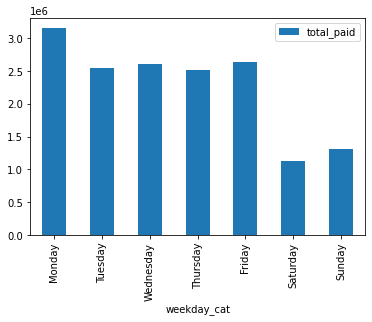

In [26]:
rev_by_day = pd.DataFrame(
    orders
    .loc[orders['state'] == 'Completed', 'total_paid']
    .groupby(orders.weekday)
    .sum()
)
rev_by_day.reset_index(inplace=True)

rev_by_day['weekday_cat'] = pd.Categorical(
    rev_by_day['weekday'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered = True
)
rev_by_day = rev_by_day.sort_values('weekday_cat')

print(rev_by_day.head(10))

rev_by_day.plot.bar(x = 'weekday_cat')
